# Arulin Vs. Novadra: Clinical Trial Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Gather

In [2]:
patients = pd.read_csv("patients.csv")
treatments = pd.concat([pd.read_csv("treatments.csv"), pd.read_csv("treatments_cut.csv")])
reactions = pd.read_csv("adverse_reactions.csv")


## Assess

In [3]:
patients.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1


In [4]:
patients.dtypes

patient_id        int64
assigned_sex     object
given_name       object
surname          object
address          object
city             object
state            object
zip_code        float64
country          object
contact          object
birthdate        object
weight          float64
height            int64
bmi             float64
dtype: object

In [5]:
patients.describe()

,patient_id,zip_code,weight,height,bmi
count,503.000000,491.000000,503.000000,503.000000,503.000000
mean,252.000000,49084.118126,173.434990,66.634195,27.483897
std,145.347859,30265.807442,33.916741,4.411297,5.276438
min,1.000000,1002.000000,48.800000,27.000000,17.100000
25%,126.500000,21920.500000,149.300000,63.000000,23.300000
50%,252.000000,48057.000000,175.300000,67.000000,27.200000
75%,377.500000,75679.000000,199.500000,70.000000,31.750000
max,503.000000,99701.000000,255.900000,79.000000,37.700000


In [6]:
patients.sample(5)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
231,232,female,Stefanie,Herman,204 Rockwell Lane,Halifax,NC,27839.0,United States,StefanieHerman@fleckens.hu1 252 583 5410,9/3/1978,217.8,67,34.1
47,48,female,Ana,Correia,1495 Post Farm Road,Atlanta,GA,30337.0,United States,404-289-1766AnaSousaCorreia@rhyta.com,11/4/1962,186.6,65,31.0
58,59,female,Yasmin,Araujo,3682 Stiles Street,Pittsburgh,PA,15205.0,United States,YasminCardosoAraujo@superrito.com412-640-7035,3/21/1981,196.0,67,30.7
464,465,female,Meaza,Brhane,142 Broad Street,Springville,AL,35146.0,United States,MeazaBrhane@superrito.com205-467-9279,6/22/1991,161.3,69,23.8
362,363,male,Luboš,Pecha,1510 Allison Avenue,Norfolk,VA,23510.0,United States,757-624-1525LubosPecha@rhyta.com,1/24/1936,132.2,69,19.5


In [7]:
patients.isnull().sum()

patient_id       0
assigned_sex     0
given_name       0
surname          0
address         12
city            12
state           12
zip_code        12
country         12
contact         12
birthdate        0
weight           0
height           0
bmi              0
dtype: int64

In [8]:
patients.duplicated().sum()

0

In [9]:
patients.duplicated(subset=["contact"]).sum()

19

In [10]:
mask = patients.duplicated(subset=["contact"], keep=False)
patients[mask].dropna()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
24,25,male,Jakob,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771.0,United States,JakobCJakobsen@einrot.com+1 (845) 858-7707,8/1/1985,155.8,67,24.4
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771.0,United States,JakobCJakobsen@einrot.com+1 (845) 858-7707,8/1/1985,155.8,67,24.4
97,98,male,Patrick,Gersten,2778 North Avenue,Burr,NE,68324.0,United States,PatrickGersten@rhyta.com402-848-4923,5/3/1954,138.2,71,19.3
131,132,female,Sandra,Taylor,2476 Fulton Street,Rainelle,WV,25962.0,United States,304-438-2648SandraCTaylor@dayrep.com,10/23/1960,206.1,64,35.4
215,216,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
229,230,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
237,238,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
244,245,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
251,252,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
277,278,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4


In [11]:
patients["state"].value_counts()

California    36
TX            32
New York      25
CA            24
NY            22
MA            22
PA            18
GA            15
Illinois      14
OH            14
OK            13
MI            13
Florida       13
LA            13
NJ            12
VA            11
MS            10
WI            10
IL            10
IN             9
MN             9
FL             9
AL             9
TN             9
WA             8
NC             8
KY             8
MO             7
ID             6
NV             6
KS             6
SC             5
IA             5
CT             5
ME             4
RI             4
Nebraska       4
ND             4
CO             4
AZ             4
AR             4
MD             3
DE             3
WV             3
SD             3
OR             3
NE             2
MT             2
VT             2
DC             2
AK             1
WY             1
NH             1
NM             1
Name: state, dtype: int64

In [12]:
patients["assigned_sex"].value_counts()

male      253
female    250
Name: assigned_sex, dtype: int64

<AxesSubplot:>

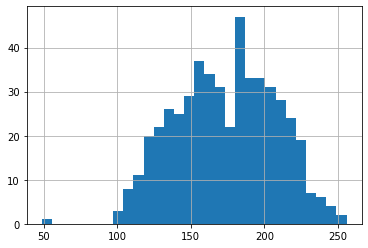

In [13]:
patients["weight"].hist(bins=30)

In [14]:
mask = patients["weight"] < 60
patients[mask]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
210,211,female,Camilla,Zaitseva,4689 Briarhill Lane,Wooster,OH,44691.0,United States,330-202-2145CamillaZaitseva@superrito.com,11/26/1938,48.8,63,19.1


<AxesSubplot:>

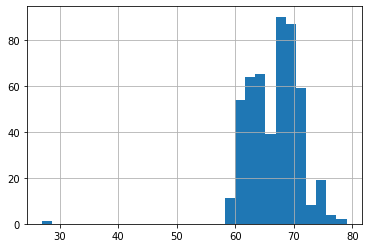

In [15]:
patients["height"].hist(bins=30)

In [16]:
mask = patients["height"] < 30
patients[mask]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1


<AxesSubplot:>

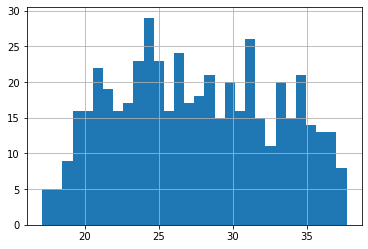

In [17]:
patients["bmi"].hist(bins=30)

<AxesSubplot:>

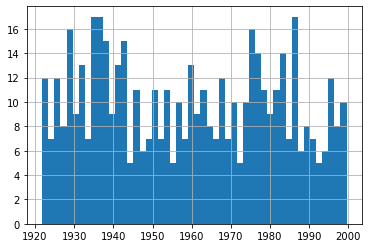

In [18]:
temp = pd.to_datetime(patients["birthdate"])
temp.hist(bins=50)

In [19]:
temp = patients["zip_code"].astype(str).str[:-2]
temp.str.count(".").value_counts()

5    442
4     49
1     12
Name: zip_code, dtype: int64

In [20]:
mask = temp.str.count(".") == 4
patients[mask]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
20,21,female,Sofia,Karlsen,2931 Romano Street,Whitman,MA,2382.0,United States,SofiaTKarlsen@teleworm.us1 781 447 1763,9/24/1934,153.1,66,24.7
34,35,female,Mariana,Souza,577 Chipmunk Lane,Orrington,ME,4474.0,United States,207-825-8634MarianaGomesSouza@superrito.com,3/6/1948,152.9,63,27.1
38,39,female,Genet,Fesahaye,4649 Joanne Lane,Westborough,MA,1581.0,United States,GenetFesahaye@armyspy.com1 978 460 9060,1/11/1954,111.8,67,17.5
39,40,female,Ganimete,Ščančar,4105 Ferguson Street,Walpole,MA,2081.0,United States,508-454-2027GanimeteScancar@cuvox.de,10/25/1947,191.6,67,30.0
44,45,female,Blanka,Jurković,3165 Upton Avenue,Waterville,ME,4901.0,United States,BlankaJurkovic@superrito.com1 207 861 4587,1/26/1923,129.8,66,20.9
53,54,male,Kwemtochukwu,Ogochukwu,2172 Lynn Street,Franklin,MA,2038.0,United States,617-317-5055KwemtochukwuOgochukwu@einrot.com,6/30/1976,150.5,72,20.4
54,55,female,Louise,Johnson,4984 Hampton Meadows,Burlington,MA,1803.0,United States,LouiseJohnson@rhyta.com978-407-1874,3/1/1931,141.0,62,25.8
62,63,female,Firenze,Fodor,1786 Gerald L. Bates Drive,Belmont,MA,2178.0,United States,617-883-5967FodorFirenze@dayrep.com,4/1/1943,131.1,60,25.6
67,68,male,Nebechi,Ekechukwu,2418 Smith Street,Marlboro,MA,1752.0,United States,NebechiEkechukwu@teleworm.us508-804-4850,1/11/1945,154.9,64,26.6


In [21]:
patients["city"].value_counts()

New York         18
San Diego         8
Tulsa             7
Atlanta           6
Houston           6
                 ..
Yazoo City        1
Olathe            1
Winnsboro         1
Chester           1
Overland Park     1
Name: city, Length: 349, dtype: int64

In [22]:
patients["city"].sample(5)

153        Reno
342    Hartford
481       Tulsa
467     Redding
126      Boston
Name: city, dtype: object

In [23]:
treatments.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


<AxesSubplot:>

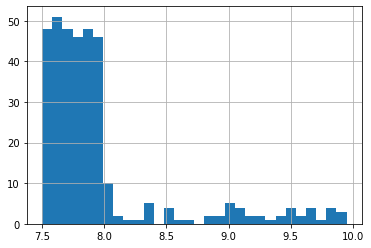

In [24]:
treatments["hba1c_start"].hist(bins=30)

<AxesSubplot:>

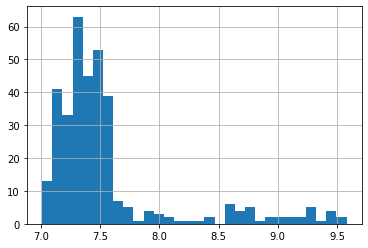

In [25]:
treatments["hba1c_end"].hist(bins=30)

In [26]:
treatments.isnull().sum()

given_name        0
surname           0
auralin           0
novodra           0
hba1c_start       0
hba1c_end         0
hba1c_change    137
dtype: int64

In [27]:
treatments.duplicated().sum()

1

In [28]:
treatments.duplicated(subset=["given_name", "surname"]).sum()

1

In [29]:
reactions.head()

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation


In [30]:
reactions

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation
5,jasmine,sykes,hypoglycemia
6,louise,johnson,hypoglycemia
7,albinca,komavec,hypoglycemia
8,noe,aranda,hypoglycemia
9,sofia,hermansen,injection site discomfort


In [31]:
reactions.duplicated().sum()

0

### Assess:
   - `patients` table:
       - `contact` column has two pieces of data email and mobile
       - mobile appear in different formats
       - `patient_id` and `zip_code` are numeric datatypes
       - demographic data are missing for 12 patients
       - duplicated rows (24, 29), (97, 502), (131, 282)
       - duplicated patient "John Doe"
       - `state` column has data in appreviation and other in full name
       - `weight` of patient 211 is incorrect (ie.: 48.8 instead of 108)
       - `height` of patient 5 is incorrect (ie.: 27 instead of 72)
       - `birthdate` is str not datetime
       - `zip_code` some values are of 4 digits
       - `given_name` and `surname` are in title case
       
   - `treatments` table:
       - `hba1c_change` has null values
       - `arulin` and `novodra` has missing values represented as `-`
       - `arulin` and `novodra` has two pieces of information start/end dose
       - one duplicated row
   
   - `reactions` table:
       - `adverse_reaction` column belong to `treatments` table

## Clean

In [32]:
patients_clean = patients.copy()
treatments_clean = treatments.copy()
reactions_clean = reactions.copy()

#### Define
   - separate email and mobile in two different columns

#### Code

In [33]:
pattern = r"(\d{3}-\d{3}-\d{4}|\+?1 \(?\d{3}\)? \d{3}[ -]\d{4}|\d{10})"
patients_clean["mobile"] = patients_clean["contact"].str.extract(pattern).rename(columns={0:"mobile"})
patients_clean["email"] = patients_clean["contact"].str.replace(pattern, "", regex=True)

#### Test

In [34]:
patients_clean[["contact", "mobile", "email"]].sample(5)

,contact,mobile,email
452,717-368-8321FearneMcGregor@superrito.com,717-368-8321,FearneMcGregor@superrito.com
282,304-438-2648SandraCTaylor@dayrep.com,304-438-2648,SandraCTaylor@dayrep.com
426,305-434-6299RogelioJTaylor@teleworm.us,305-434-6299,RogelioJTaylor@teleworm.us
424,KrystianaKozlowska@cuvox.de+1 (401) 419-2975,+1 (401) 419-2975,KrystianaKozlowska@cuvox.de
275,EddieAArcher@gustr.com+1 (224) 305-6805,+1 (224) 305-6805,EddieAArcher@gustr.com


#### Define:
   - convert `patient_id` and `zip_code` to str and `birthdate` to datetime

#### Clean

In [35]:
patients_clean["zip_code"] = patients["zip_code"].astype(str).str[:-2]
patients_clean["patient_id"] = patients["patient_id"].astype(str)
patients_clean["birthdate"] = pd.to_datetime(patients_clean["birthdate"])

#### Test

In [36]:
patients_clean.dtypes

patient_id              object
assigned_sex            object
given_name              object
surname                 object
address                 object
city                    object
state                   object
zip_code                object
country                 object
contact                 object
birthdate       datetime64[ns]
weight                 float64
height                   int64
bmi                    float64
mobile                  object
email                   object
dtype: object

#### Define
   - drop duplicated rows (24, 29), (97, 502), (131, 282)
   - drop duplicated rows of John Doe

#### Clean


In [37]:
patients_clean.drop(index=[29, 502, 282], inplace=True)
patients_clean.drop_duplicates(subset=["given_name", "surname"], inplace = True)

#### Test

In [38]:
mask = patients_clean.duplicated(subset=["contact"], keep=False)
patients_clean[mask].dropna()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi,mobile,email


#### Define
   - convert all states to appreviation

#### Clean

In [39]:
state_map = {
    "California": "CA",
    "New York": "NY",
    "Illinois": "IL",
    "Florida": "FL",
    "Nebraska": "NE",
}
patients_clean["state"].replace(state_map, inplace=True)

#### Test

In [40]:
patients_clean["state"].value_counts()

CA    60
NY    41
TX    32
IL    24
FL    22
MA    22
PA    18
GA    15
OH    14
MI    13
OK    13
LA    13
NJ    12
VA    11
WI    10
MS    10
AL     9
TN     9
IN     9
MN     9
NC     8
KY     8
WA     8
MO     7
KS     6
ID     6
NV     6
SC     5
NE     5
IA     5
CT     5
RI     4
ND     4
AR     4
AZ     4
ME     4
CO     4
MD     3
DE     3
SD     3
OR     3
WV     2
VT     2
MT     2
DC     2
AK     1
NM     1
NH     1
WY     1
Name: state, dtype: int64

#### Define:
   - correct weight of patient 211 from 48.8 to 108
   - correct height of patient 5 from 27 to 72

#### Clean

In [41]:
mask = patients_clean["patient_id"] == "211"
patients_clean.loc[mask, "weight"] = 108

mask = patients_clean["patient_id"] == "5"
patients_clean.loc[mask, "height"] = 72


#### Test

In [42]:
mask = (patients_clean["patient_id"] == "211") | (patients_clean["patient_id"] == "5")
patients_clean.loc[mask, ["weight", "height"]]

,weight,height
4,192.3,72
210,108.0,63


#### Define
   - convert `surname` and `given_name` to lower

#### Clean

In [43]:
patients_clean[["given_name", "surname"]] = patients_clean[["given_name", "surname"]].applymap(str.lower)

#### Test

In [44]:
patients_clean.sample(5)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi,mobile,email
192,193,female,jade,parker,2957 Feathers Hooves Drive,Garden City,NY,11530,United States,631-704-6487JadeParker@superrito.com,1927-06-19,188.8,63,33.4,631-704-6487,JadeParker@superrito.com
216,217,female,gabrielle,bidwill,3479 Elm Drive,Manhattan,NY,10016,United States,646-472-4758GabrielleBidwill@teleworm.us,1963-10-11,170.1,67,26.6,646-472-4758,GabrielleBidwill@teleworm.us
247,248,male,tuukka,leppäluoto,1886 Bicetown Road,New York,NY,10011,United States,917-408-8855TuukkaLeppaluoto@teleworm.us,1978-03-07,211.0,73,27.8,917-408-8855,TuukkaLeppaluoto@teleworm.us
335,336,female,lixue,hsueh,1540 Overlook Drive,Crawfordsville,IN,47933,United States,765-359-0147LixueHsueh@dayrep.com,1925-03-29,102.7,59,20.7,765-359-0147,LixueHsueh@dayrep.com
499,500,male,ruman,bisliev,494 Clarksburg Park Road,Sedona,AZ,86341,United States,928-284-4492RumanBisliev@gustr.com,1948-03-26,239.6,70,34.4,928-284-4492,RumanBisliev@gustr.com


#### Define
   - create new column for treatment that has value novadra of arulin
   - another column dose value of dose

#### Clean

In [45]:
treatments_clean = treatments_clean.melt(id_vars=["given_name", "surname", "hba1c_start", "hba1c_end", "hba1c_change"]
                        , value_vars=["auralin", "novodra"], var_name="treatment", value_name="dose").sort_values(["given_name", "surname"])

#### Test

In [46]:
treatments_clean

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose
259,aaliyah,rice,7.64,7.33,0.31,auralin,-
609,aaliyah,rice,7.64,7.33,0.31,novodra,31u - 31u
96,abdul-nur,isa,7.98,7.53,0.95,auralin,-
446,abdul-nur,isa,7.98,7.53,0.95,novodra,54u - 50u
99,abel,yonatan,7.88,7.50,NaN,auralin,-
...,...,...,...,...,...,...,...
566,þórunn,tryggvadóttir,7.98,7.51,NaN,novodra,30u - 32u
325,štefanija,novosel,7.64,7.17,NaN,auralin,37u - 42u
675,štefanija,novosel,7.64,7.17,NaN,novodra,-
343,žarka,rap,7.54,7.15,NaN,auralin,35u - 48u


#### Define
   - drop all rows with '-' in column `dose`

#### Clean

In [48]:
treatments_clean = treatments_clean.replace("-", np.nan).dropna(subset=["dose"])

#### Test

In [49]:
treatments_clean

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose
609,aaliyah,rice,7.64,7.33,0.31,novodra,31u - 31u
446,abdul-nur,isa,7.98,7.53,0.95,novodra,54u - 50u
449,abel,yonatan,7.88,7.50,NaN,novodra,38u - 39u
368,addolorata,lombardi,7.75,7.33,NaN,novodra,49u - 46u
565,adib,ghanem,7.59,7.12,0.97,novodra,46u - 49u
...,...,...,...,...,...,...,...
657,zoe,wellish,7.71,7.30,0.91,novodra,33u - 33u
390,ásta,grímsdóttir,7.62,7.16,0.96,novodra,29u - 30u
566,þórunn,tryggvadóttir,7.98,7.51,NaN,novodra,30u - 32u
325,štefanija,novosel,7.64,7.17,NaN,auralin,37u - 42u


#### Define
   - recalculate `hba1c_change` by subracting `hba1c_end` from `hba1c_start`

#### Clean

In [50]:
treatments_clean["hba1c_change"] = treatments_clean["hba1c_start"] - treatments_clean["hba1c_end"]

#### Test

In [52]:
treatments_clean["hba1c_change"].isnull().sum()

0

#### Define
   - separate start dose and end dose from `dose` column

#### Clean

In [58]:
treatments_clean = treatments_clean.join(treatments_clean["dose"].str.extract("(\d+)u - (\d+)u").rename(columns={0: "start_dose", 1: "end_dose"}))
treatments_clean.drop(columns=["dose"], inplace=True)

#### Test

In [59]:
treatments_clean

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,start_dose,end_dose
609,aaliyah,rice,7.64,7.33,0.31,novodra,31,31
446,abdul-nur,isa,7.98,7.53,0.45,novodra,54,50
449,abel,yonatan,7.88,7.50,0.38,novodra,38,39
368,addolorata,lombardi,7.75,7.33,0.42,novodra,49,46
565,adib,ghanem,7.59,7.12,0.47,novodra,46,49
...,...,...,...,...,...,...,...,...
657,zoe,wellish,7.71,7.30,0.41,novodra,33,33
390,ásta,grímsdóttir,7.62,7.16,0.46,novodra,29,30
566,þórunn,tryggvadóttir,7.98,7.51,0.47,novodra,30,32
325,štefanija,novosel,7.64,7.17,0.47,auralin,37,42


## Visualization

<AxesSubplot:xlabel='treatment'>

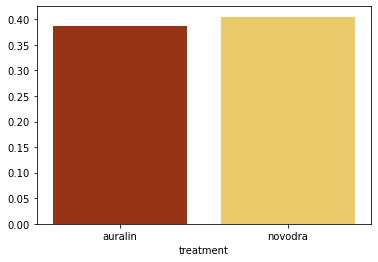

In [82]:
temp = treatments_clean.groupby("treatment")["hba1c_change"].mean()

sns.barplot(x=temp.index, y=temp.values, palette="afmhot")

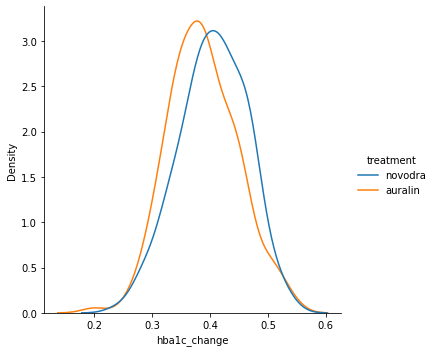

In [67]:

sns.displot(x=treatments_clean["hba1c_change"], hue=treatments_clean["treatment"], kind="kde")

In [76]:
bins = [16, 18.5, 25, 30, 38]
groups = ["Underweight", "Normal", "Overweight", "Obese"]
bmi_cuts = pd.cut(patients_clean["bmi"], bins, labels=groups)
patients_clean["weight_status"] = bmi_cuts
patients_clean

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi,mobile,email,weight_status
0,1,female,zoe,wellish,576 Brown Bear Drive,Rancho California,CA,92390,United States,951-719-9170ZoeWellish@superrito.com,1976-07-10,121.7,66,19.6,951-719-9170,ZoeWellish@superrito.com,Normal
1,2,female,pamela,hill,2370 University Hill Road,Armstrong,IL,61812,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,1967-04-03,118.8,66,19.2,+1 (217) 569-3204,PamelaSHill@cuvox.de,Normal
2,3,male,jae,debord,1493 Poling Farm Road,York,NE,68467,United States,402-363-6804JaeMDebord@gustr.com,1980-02-19,177.8,71,24.8,402-363-6804,JaeMDebord@gustr.com,Normal
3,4,male,liêm,phan,2335 Webster Street,Woodbridge,NJ,7095,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,1951-07-26,220.9,70,31.7,+1 (732) 636-8246,PhanBaLiem@jourrapide.com,Obese
4,5,male,tim,neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,334-515-7487TimNeudorf@cuvox.de,1928-02-18,192.3,72,26.1,334-515-7487,TimNeudorf@cuvox.de,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,498,male,masataka,murakami,1179 Patton Lane,Tulsa,OK,74116,United States,MasatakaMurakami@einrot.com+1 (918) 984-9171,1937-08-19,155.1,72,21.0,+1 (918) 984-9171,MasatakaMurakami@einrot.com,Normal
498,499,male,mustafa,lindström,2530 Victoria Court,Milton Mills,ME,3852,United States,207-477-0579MustafaLindstrom@jourrapide.com,1959-04-10,181.1,72,24.6,207-477-0579,MustafaLindstrom@jourrapide.com,Normal
499,500,male,ruman,bisliev,494 Clarksburg Park Road,Sedona,AZ,86341,United States,928-284-4492RumanBisliev@gustr.com,1948-03-26,239.6,70,34.4,928-284-4492,RumanBisliev@gustr.com,Obese
500,501,female,jinke,de keizer,649 Nutter Street,Overland Park,MO,64110,United States,816-223-6007JinkedeKeizer@teleworm.us,1971-01-13,171.2,67,26.8,816-223-6007,JinkedeKeizer@teleworm.us,Overweight


In [78]:
all_data = patients_clean.merge(treatments_clean, on=["given_name", "surname"])
all_data

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,...,bmi,mobile,email,weight_status,hba1c_start,hba1c_end,hba1c_change,treatment,start_dose,end_dose
0,1,female,zoe,wellish,576 Brown Bear Drive,Rancho California,CA,92390,United States,951-719-9170ZoeWellish@superrito.com,...,19.6,951-719-9170,ZoeWellish@superrito.com,Normal,7.71,7.30,0.41,novodra,33,33
1,2,female,pamela,hill,2370 University Hill Road,Armstrong,IL,61812,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,...,19.2,+1 (217) 569-3204,PamelaSHill@cuvox.de,Normal,9.53,9.10,0.43,novodra,27,29
2,4,male,liêm,phan,2335 Webster Street,Woodbridge,NJ,7095,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,...,31.7,+1 (732) 636-8246,PhanBaLiem@jourrapide.com,Obese,7.58,7.10,0.48,novodra,43,48
3,6,male,rafael,costa,1140 Willis Avenue,Daytona Beach,FL,32114,United States,386-334-5237RafaelCardosoCosta@gustr.com,...,26.4,386-334-5237,RafaelCardosoCosta@gustr.com,Overweight,7.73,7.34,0.39,auralin,50,60
4,7,female,mary,adams,3145 Sheila Lane,Burbank,NV,84728,United States,775-533-5933MaryBAdams@einrot.com,...,24.3,775-533-5933,MaryBAdams@einrot.com,Normal,7.65,7.26,0.39,novodra,32,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,495,female,sirkka,piirainen,4102 Ritter Avenue,Roseville,MI,48066,United States,SirkkaPiirainen@teleworm.us+1 (586) 790-0975,...,19.8,+1 (586) 790-0975,SirkkaPiirainen@teleworm.us,Normal,8.90,8.59,0.31,novodra,26,24
345,497,male,alexander,hueber,3868 Freed Drive,Stockton,CA,95204,United States,AlexanderHueber@jourrapide.com1 209 762 2320,...,26.3,1 209 762 2320,AlexanderHueber@jourrapide.com,Overweight,7.71,7.35,0.36,auralin,35,38
346,499,male,mustafa,lindström,2530 Victoria Court,Milton Mills,ME,3852,United States,207-477-0579MustafaLindstrom@jourrapide.com,...,24.6,207-477-0579,MustafaLindstrom@jourrapide.com,Normal,7.92,7.60,0.32,novodra,35,33
347,500,male,ruman,bisliev,494 Clarksburg Park Road,Sedona,AZ,86341,United States,928-284-4492RumanBisliev@gustr.com,...,34.4,928-284-4492,RumanBisliev@gustr.com,Obese,7.72,7.39,0.33,auralin,46,53


In [84]:
temp = all_data.groupby(["treatment", "weight_status"])["hba1c_change"].mean().reset_index()
temp

,treatment,weight_status,hba1c_change
0,auralin,Underweight,0.420000
1,auralin,Normal,0.396949
2,auralin,Overweight,0.380851
3,auralin,Obese,0.382727
4,novodra,Underweight,0.452500
5,novodra,Normal,0.393699
6,novodra,Overweight,0.403478
7,novodra,Obese,0.417843


<AxesSubplot:xlabel='hba1c_change', ylabel='weight_status'>

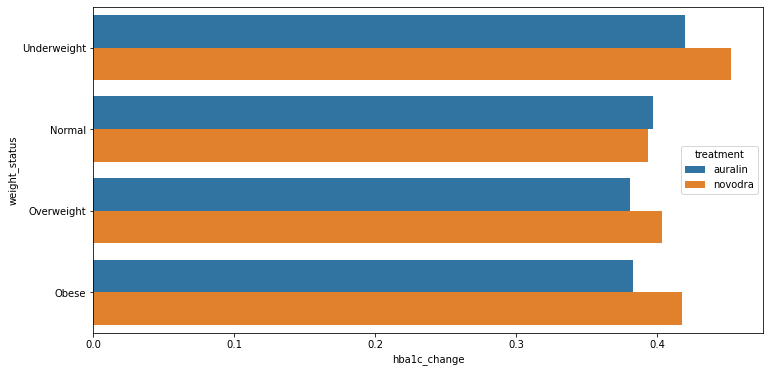

In [87]:
plt.figure(figsize=(12, 6))
sns.barplot(y=temp["weight_status"], x=temp["hba1c_change"], hue=temp["treatment"])

In [95]:
all_data["age"] = (pd.to_datetime("now") - all_data["birthdate"]) / np.timedelta64(1, "Y")
all_data

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,...,mobile,email,weight_status,hba1c_start,hba1c_end,hba1c_change,treatment,start_dose,end_dose,age
0,1,female,zoe,wellish,576 Brown Bear Drive,Rancho California,CA,92390,United States,951-719-9170ZoeWellish@superrito.com,...,951-719-9170,ZoeWellish@superrito.com,Normal,7.71,7.30,0.41,novodra,33,33,45.631442
1,2,female,pamela,hill,2370 University Hill Road,Armstrong,IL,61812,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,...,+1 (217) 569-3204,PamelaSHill@cuvox.de,Normal,9.53,9.10,0.43,novodra,27,29,54.901995
2,4,male,liêm,phan,2335 Webster Street,Woodbridge,NJ,7095,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,...,+1 (732) 636-8246,PhanBaLiem@jourrapide.com,Obese,7.58,7.10,0.48,novodra,43,48,70.590203
3,6,male,rafael,costa,1140 Willis Avenue,Daytona Beach,FL,32114,United States,386-334-5237RafaelCardosoCosta@gustr.com,...,386-334-5237,RafaelCardosoCosta@gustr.com,Overweight,7.73,7.34,0.39,auralin,50,60,90.492049
4,7,female,mary,adams,3145 Sheila Lane,Burbank,NV,84728,United States,775-533-5933MaryBAdams@einrot.com,...,775-533-5933,MaryBAdams@einrot.com,Normal,7.65,7.26,0.39,novodra,32,33,52.270867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,495,female,sirkka,piirainen,4102 Ritter Avenue,Roseville,MI,48066,United States,SirkkaPiirainen@teleworm.us+1 (586) 790-0975,...,+1 (586) 790-0975,SirkkaPiirainen@teleworm.us,Normal,8.90,8.59,0.31,novodra,26,24,80.112643
345,497,male,alexander,hueber,3868 Freed Drive,Stockton,CA,95204,United States,AlexanderHueber@jourrapide.com1 209 762 2320,...,1 209 762 2320,AlexanderHueber@jourrapide.com,Overweight,7.71,7.35,0.36,auralin,35,38,79.458283
346,499,male,mustafa,lindström,2530 Victoria Court,Milton Mills,ME,3852,United States,207-477-0579MustafaLindstrom@jourrapide.com,...,207-477-0579,MustafaLindstrom@jourrapide.com,Normal,7.92,7.60,0.32,novodra,35,33,62.882994
347,500,male,ruman,bisliev,494 Clarksburg Park Road,Sedona,AZ,86341,United States,928-284-4492RumanBisliev@gustr.com,...,928-284-4492,RumanBisliev@gustr.com,Obese,7.72,7.39,0.33,auralin,46,53,73.922235


In [97]:
bins = [20, 35, 50, 70, 110]
groups = ["Youth", "Mid-age", "Seniors", "Old"]
all_data["age_group"] = pd.cut(all_data["age"], bins, labels=groups)
all_data

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,...,email,weight_status,hba1c_start,hba1c_end,hba1c_change,treatment,start_dose,end_dose,age,age_group
0,1,female,zoe,wellish,576 Brown Bear Drive,Rancho California,CA,92390,United States,951-719-9170ZoeWellish@superrito.com,...,ZoeWellish@superrito.com,Normal,7.71,7.30,0.41,novodra,33,33,45.631442,Mid-age
1,2,female,pamela,hill,2370 University Hill Road,Armstrong,IL,61812,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,...,PamelaSHill@cuvox.de,Normal,9.53,9.10,0.43,novodra,27,29,54.901995,Seniors
2,4,male,liêm,phan,2335 Webster Street,Woodbridge,NJ,7095,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,...,PhanBaLiem@jourrapide.com,Obese,7.58,7.10,0.48,novodra,43,48,70.590203,Old
3,6,male,rafael,costa,1140 Willis Avenue,Daytona Beach,FL,32114,United States,386-334-5237RafaelCardosoCosta@gustr.com,...,RafaelCardosoCosta@gustr.com,Overweight,7.73,7.34,0.39,auralin,50,60,90.492049,Old
4,7,female,mary,adams,3145 Sheila Lane,Burbank,NV,84728,United States,775-533-5933MaryBAdams@einrot.com,...,MaryBAdams@einrot.com,Normal,7.65,7.26,0.39,novodra,32,33,52.270867,Seniors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,495,female,sirkka,piirainen,4102 Ritter Avenue,Roseville,MI,48066,United States,SirkkaPiirainen@teleworm.us+1 (586) 790-0975,...,SirkkaPiirainen@teleworm.us,Normal,8.90,8.59,0.31,novodra,26,24,80.112643,Old
345,497,male,alexander,hueber,3868 Freed Drive,Stockton,CA,95204,United States,AlexanderHueber@jourrapide.com1 209 762 2320,...,AlexanderHueber@jourrapide.com,Overweight,7.71,7.35,0.36,auralin,35,38,79.458283,Old
346,499,male,mustafa,lindström,2530 Victoria Court,Milton Mills,ME,3852,United States,207-477-0579MustafaLindstrom@jourrapide.com,...,MustafaLindstrom@jourrapide.com,Normal,7.92,7.60,0.32,novodra,35,33,62.882994,Seniors
347,500,male,ruman,bisliev,494 Clarksburg Park Road,Sedona,AZ,86341,United States,928-284-4492RumanBisliev@gustr.com,...,RumanBisliev@gustr.com,Obese,7.72,7.39,0.33,auralin,46,53,73.922235,Old


In [98]:
temp = all_data.groupby(["treatment", "age_group"])["hba1c_change"].mean().reset_index()
temp

,treatment,age_group,hba1c_change
0,auralin,Youth,0.401923
1,auralin,Mid-age,0.385758
2,auralin,Seniors,0.380476
3,auralin,Old,0.387568
4,novodra,Youth,0.419474
5,novodra,Mid-age,0.401316
6,novodra,Seniors,0.404737
7,novodra,Old,0.402785


<AxesSubplot:xlabel='hba1c_change', ylabel='age_group'>

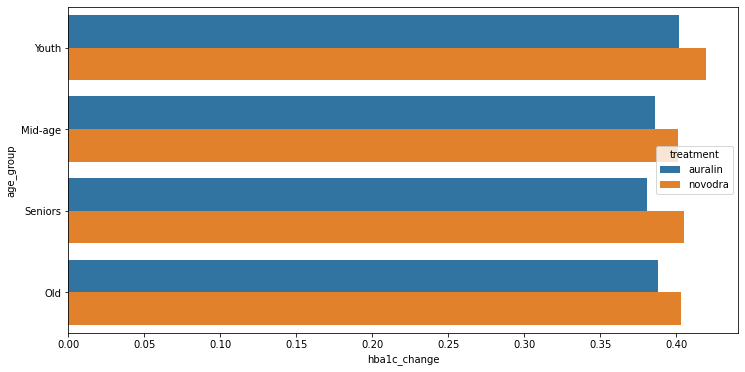

In [102]:
plt.figure(figsize=(12, 6))
sns.barplot(y=temp["age_group"], x=temp["hba1c_change"], hue=temp["treatment"])

## Conclusion